# Testing

# Definitions of Image Quality Metrics

### 1. Mean Squared Error (MSE)
Mean Squared Error measures the average squared difference between the pixel intensities of the original and reconstructed (or generated) images.  
A lower MSE indicates that the reconstructed image is closer to the original, implying better quality.  
**Formula:**  
\[
\text{MSE} = \frac{1}{mn} \sum_{i=1}^{m} \sum_{j=1}^{n} [I(i,j) - K(i,j)]^2
\]  
where \(I\) is the original image, \(K\) is the reconstructed image, and \(m, n\) are image dimensions.

---

### 2. Peak Signal-to-Noise Ratio (PSNR)
PSNR quantifies the ratio between the maximum possible power of a signal (image) and the power of corrupting noise that affects the fidelity of its representation.  
Higher PSNR values generally indicate better image quality. It is expressed in decibels (dB).  
**Formula:**  
\[
\text{PSNR} = 10 \cdot \log_{10} \left(\frac{\text{MAX}^2}{\text{MSE}}\right)
\]  
where \(\text{MAX}\) is the maximum possible pixel value (e.g., 255 for 8-bit images).

---

### 3. Structural Similarity Index (SSIM)
SSIM assesses the similarity between two images based on luminance, contrast, and structural information. It models the perceived change in structural information, making it closer to human visual perception.  
SSIM values range from -1 to 1, where 1 indicates perfect similarity.  
**Formula:**  
\[
\text{SSIM}(x,y) = \frac{(2\mu_x \mu_y + C_1)(2\sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)}
\]  
where \(\mu_x, \mu_y\) are means, \(\sigma_x^2, \sigma_y^2\) variances, \(\sigma_{xy}\) covariance of images \(x\) and \(y\), and \(C_1, C_2\) are constants to stabilize the division.


                    Dataset  Avg SSIM (Generated)  Avg SSIM (Baseline)
0  General Images (Pos+Neg)                 0.838                0.786
1       Positive Class Only                 0.866                0.849


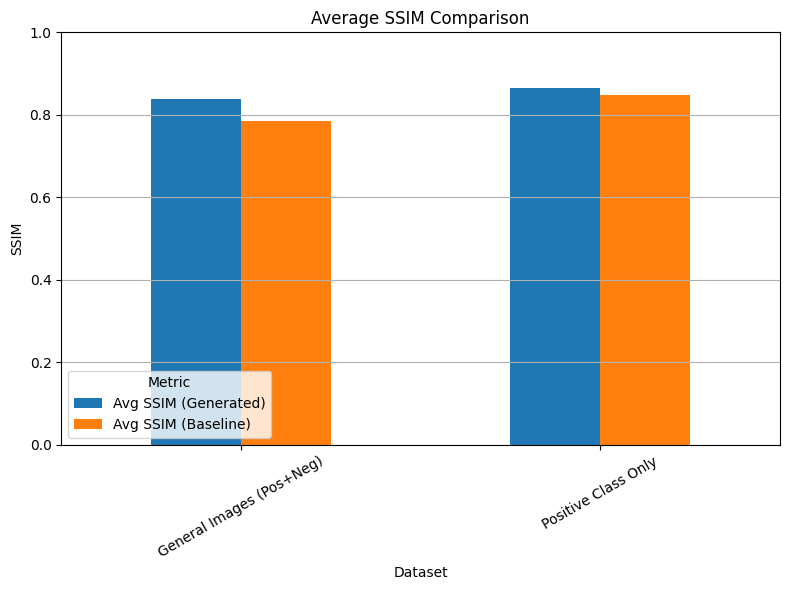

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
data = {
    'Dataset': ['General Images (Pos+Neg)', 'Positive Class Only'],
    'Avg SSIM (Generated)': [0.838, 0.866],
    'Avg SSIM (Baseline)': [0.786, 0.849]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)

# Plotting
df_plot = df.set_index('Dataset')
df_plot.plot(kind='bar', figsize=(8,6))
plt.title('Average SSIM Comparison')
plt.ylabel('SSIM')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=30)
plt.legend(title='Metric',loc='lower left')
plt.tight_layout()
plt.show()


      Class  Avg PSNR LR Upscaled  Avg PSNR Generated
0   General                 26.85               29.24
1  Positive                 26.23               27.40


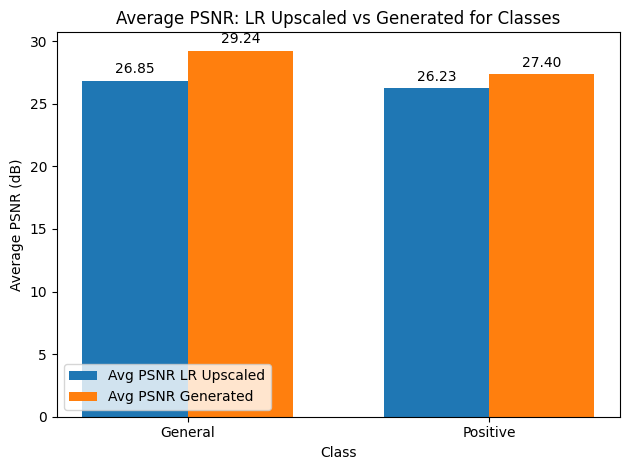

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Average PSNR values from your data
avg_general_psnr_generated = 29.24
avg_general_psnr_lr = 26.85

avg_positive_psnr_generated = 27.40
avg_positive_psnr_lr = 26.23

# Create DataFrame for averages
psnr_data = {
    'Class': ['General', 'Positive'],
    'Avg PSNR LR Upscaled': [avg_general_psnr_lr, avg_positive_psnr_lr],
    'Avg PSNR Generated': [avg_general_psnr_generated, avg_positive_psnr_generated]
}

df_psnr = pd.DataFrame(psnr_data)

print(df_psnr)

# Plotting the bar graph
classes = df_psnr['Class']
psnr_lr = df_psnr['Avg PSNR LR Upscaled']
psnr_generated = df_psnr['Avg PSNR Generated']

bar_width = 0.35
x = np.arange(len(classes))

fig, ax = plt.subplots()
bars1 = ax.bar(x - bar_width/2, psnr_lr, bar_width, label='Avg PSNR LR Upscaled')
bars2 = ax.bar(x + bar_width/2, psnr_generated, bar_width, label='Avg PSNR Generated')

ax.set_xlabel('Class')
ax.set_ylabel('Average PSNR (dB)')
ax.set_title('Average PSNR: LR Upscaled vs Generated for Classes')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend(loc='lower left')

# Add values on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()


      Class  Avg MSE LR Upscaled  Avg MSE Generated
0   General              135.742             77.829
1  Positive              170.019            129.806


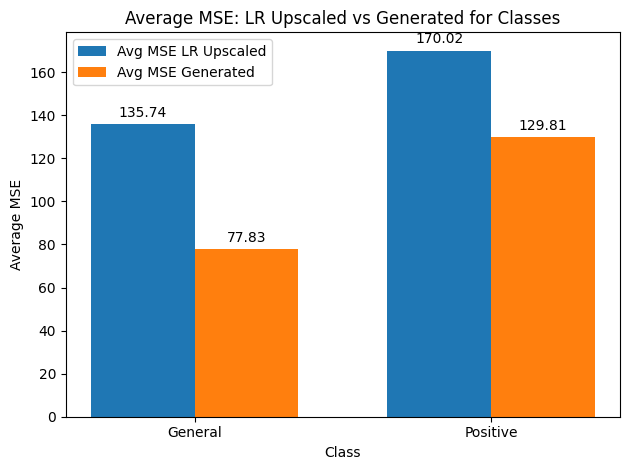

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Average MSE values from your data
avg_general_mse_generated = 77.829
avg_general_mse_lr = 135.742

avg_positive_mse_generated = 129.806
avg_positive_mse_lr = 170.019

# Create DataFrame for averages
mse_data = {
    'Class': ['General', 'Positive'],
    'Avg MSE LR Upscaled': [avg_general_mse_lr, avg_positive_mse_lr],
    'Avg MSE Generated': [avg_general_mse_generated, avg_positive_mse_generated]
}

df_mse = pd.DataFrame(mse_data)

print(df_mse)

# Plotting the bar graph
classes = df_mse['Class']
mse_lr = df_mse['Avg MSE LR Upscaled']
mse_generated = df_mse['Avg MSE Generated']

bar_width = 0.35
x = np.arange(len(classes))

fig, ax = plt.subplots()
bars1 = ax.bar(x - bar_width/2, mse_lr, bar_width, label='Avg MSE LR Upscaled')
bars2 = ax.bar(x + bar_width/2, mse_generated, bar_width, label='Avg MSE Generated')

ax.set_xlabel('Class')
ax.set_ylabel('Average MSE')
ax.set_title('Average MSE: LR Upscaled vs Generated for Classes')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend(loc='best')

# Add values on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()


## SSIM (Structural Similarity Index )

### positive class images

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(img1, img2):
    # Convert images to grayscale for SSIM calculation
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return ssim(img1_gray, img2_gray, data_range=img2_gray.max() - img2_gray.min())

def load_images(folder, count):
    files = sorted(os.listdir(folder))[:count]
    images = []
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        img = cv2.resize(img, (256, 256))  # full-size for display & SSIM
        images.append((img, f))
    return images

# Paths
base_folder = './mri-positive'
noised_folder = './noised-mri-positive'
model_path = './final_model/final_generator.h5'

n_samples = 10

# Load model
generator = load_model(model_path)
print("Model loaded!")

# Load images
base_images = load_images(base_folder, n_samples)
noised_images = load_images(noised_folder, n_samples)

results = []

for i in range(n_samples):
    orig_bgr, filename = base_images[i]
    noised_bgr, _ = noised_images[i]

    # Prepare noised image for generator
    input_img = cv2.resize(noised_bgr, (128, 128))
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img = input_img / 255.0
    input_img = np.expand_dims(input_img, axis=-1)
    input_img = np.expand_dims(input_img, axis=0)

    # Predict
    generated_img = generator.predict(input_img)[0]
    generated_img = np.squeeze(generated_img)
    generated_img = np.clip(generated_img * 255.0, 0, 255).astype(np.uint8)

    # Resize generated image to original size
    generated_resized = cv2.resize(generated_img, (256, 256))
    generated_bgr = cv2.merge([generated_resized]*3)  # convert grayscale to 3-channel BGR for consistency

    # Calculate SSIM
    ssim_gen = calculate_ssim(orig_bgr, generated_bgr)
    ssim_noised = calculate_ssim(orig_bgr, noised_bgr)

    results.append({
        'filename': filename,
        'SSIM_Generated': ssim_gen,
        'SSIM_Noisy': ssim_noised
    })

# Print results table
print("\nFinal Results Table:")
print(f"{'Filename':<30} {'SSIM (Generated)':<20} {'SSIM (Noisy)':<20}")
print("-" * 70)
for res in results:
    print(f"{res['filename']:<30} {res['SSIM_Generated']:<20.3f} {res['SSIM_Noisy']:<20.3f}")

avg_ssim_gen = np.mean([r['SSIM_Generated'] for r in results])
avg_ssim_noised = np.mean([r['SSIM_Noisy'] for r in results])

print(f"\nAverage SSIM (Generated): {avg_ssim_gen:.3f}")
print(f"Average SSIM (Noisy): {avg_ssim_noised:.3f}")


Model loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

Final Results Table:
Filename                       SSIM (Generated)     SSIM (Noisy)        
----------------------------------------------------------------------
image(1).jpg                   0.857                0.838               
image(10).jpg                  0.854                0.840               
image(100).jpg                 0.852                0.877               
image(102).jpg                 0.855                0.847               
image(106).jpg                 0.905                0.873               
image(107).jpg                 0.901                0.868        

### For general images

Model loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


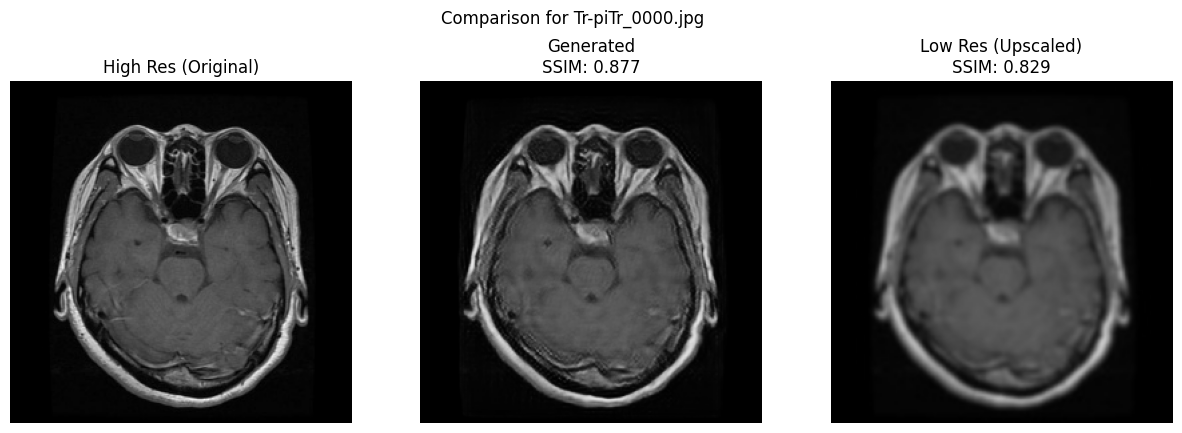

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


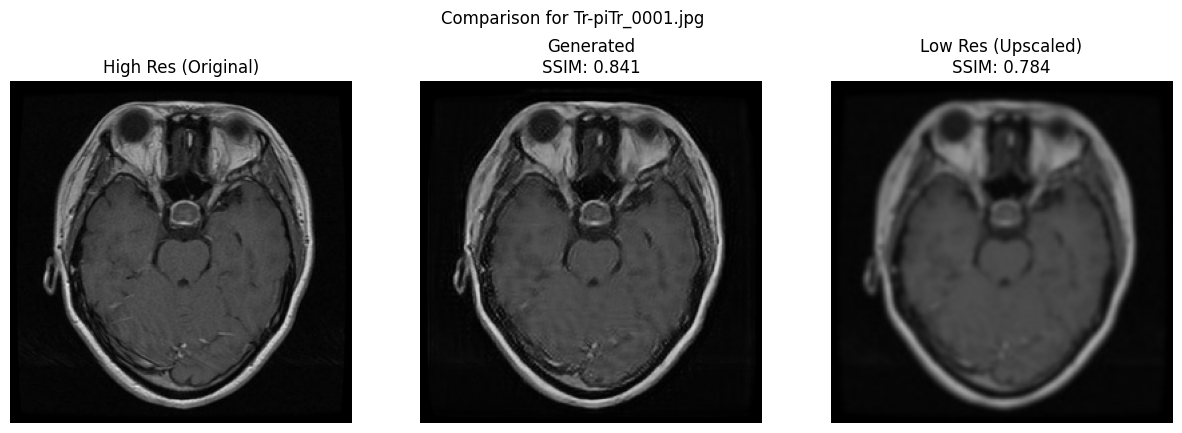

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


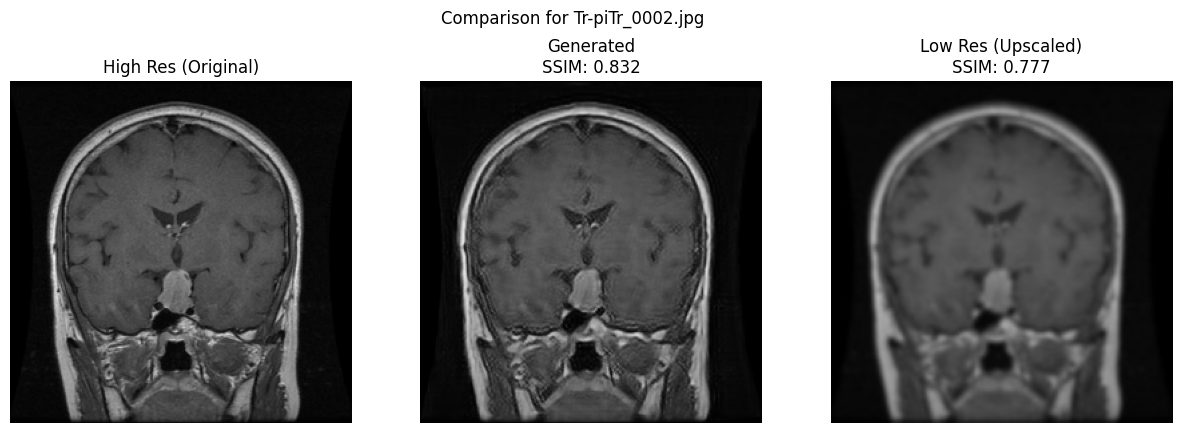

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


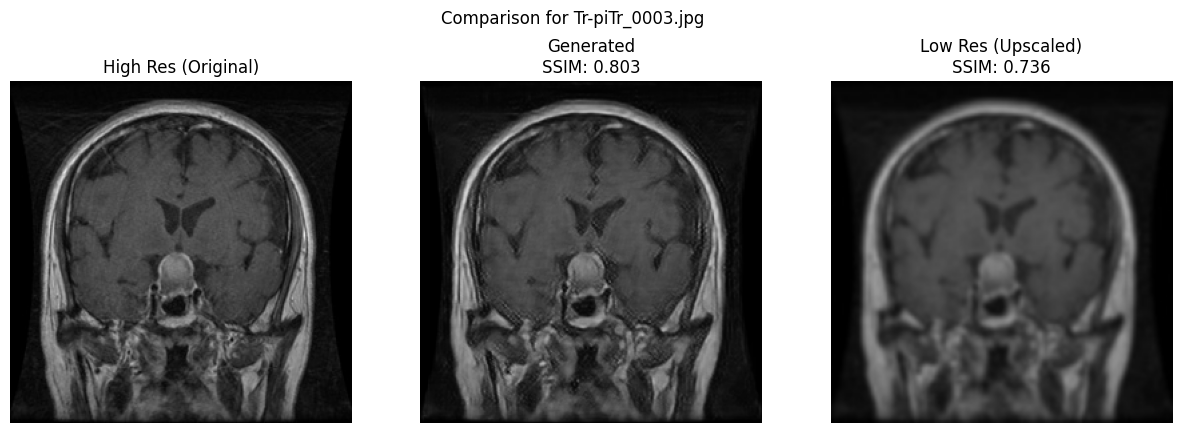

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


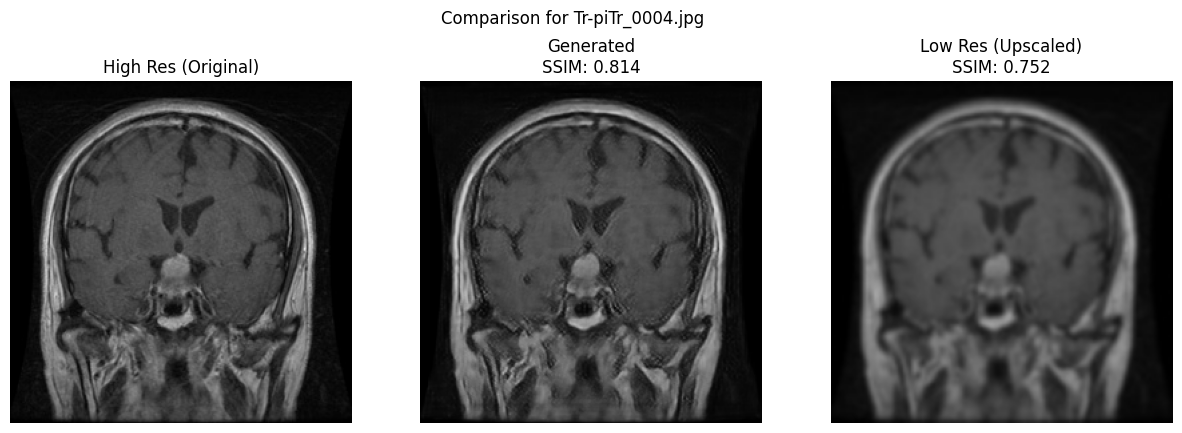

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


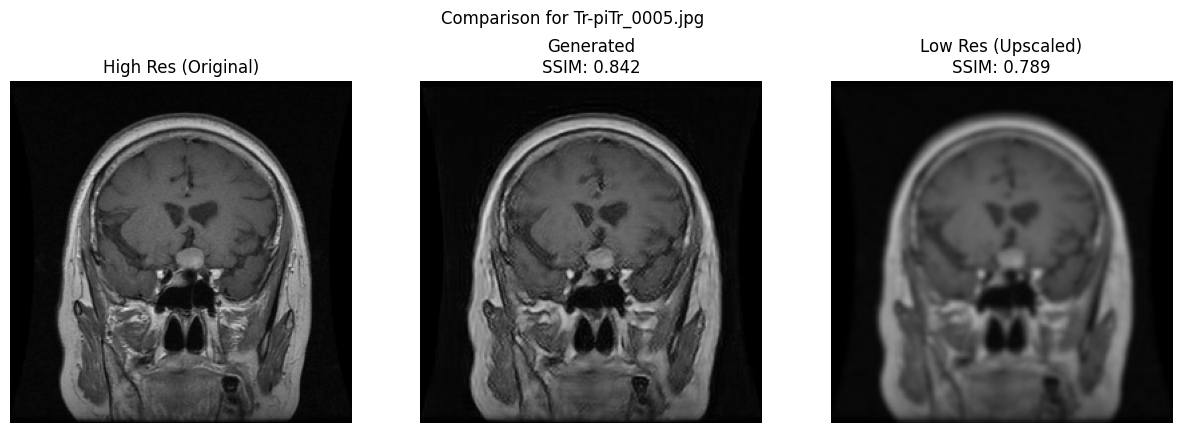

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


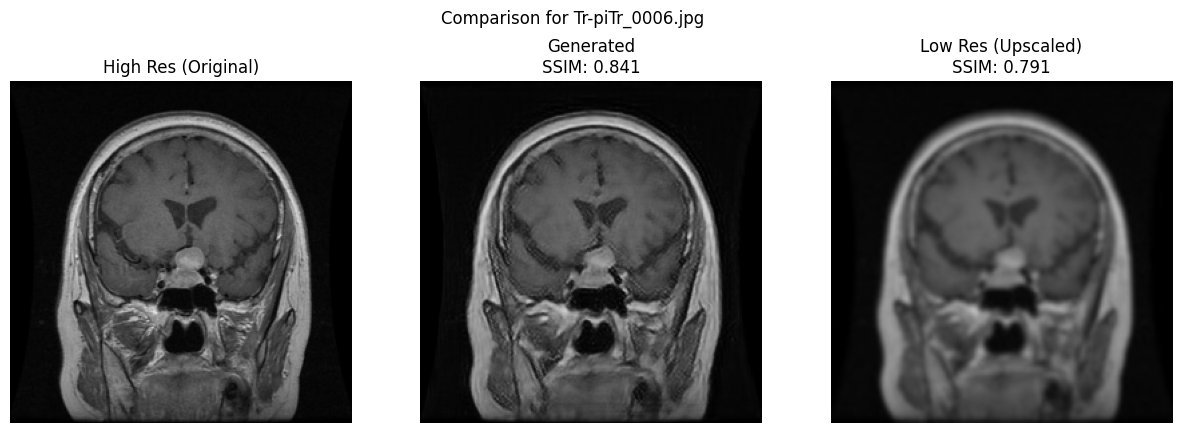

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


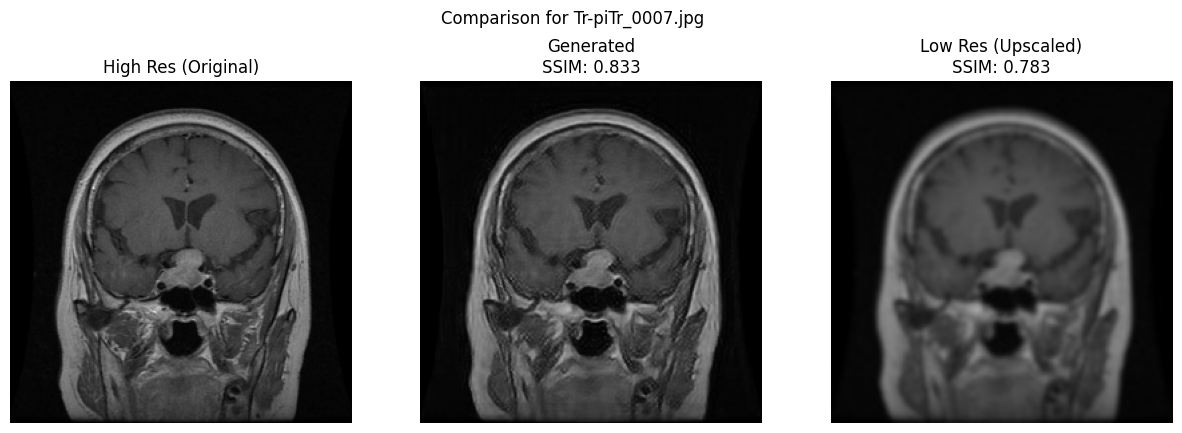

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


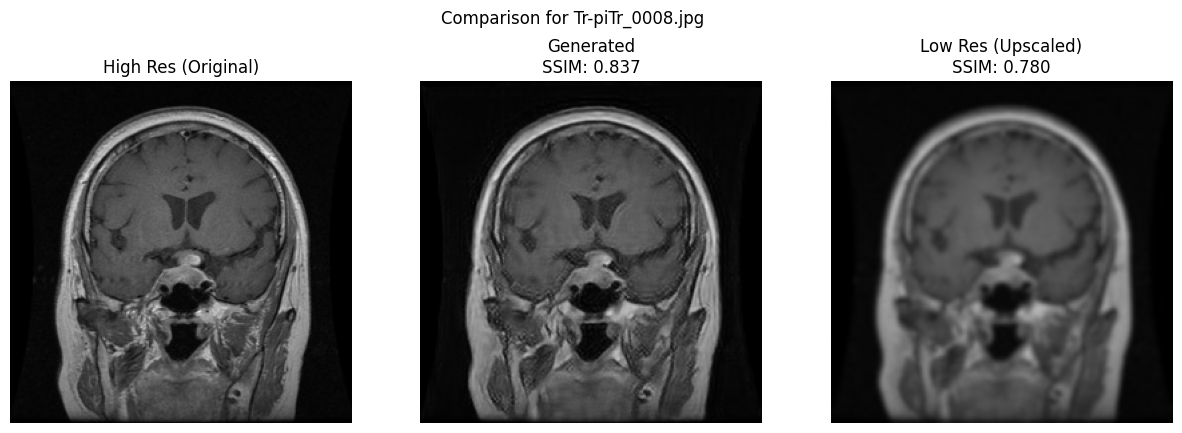

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


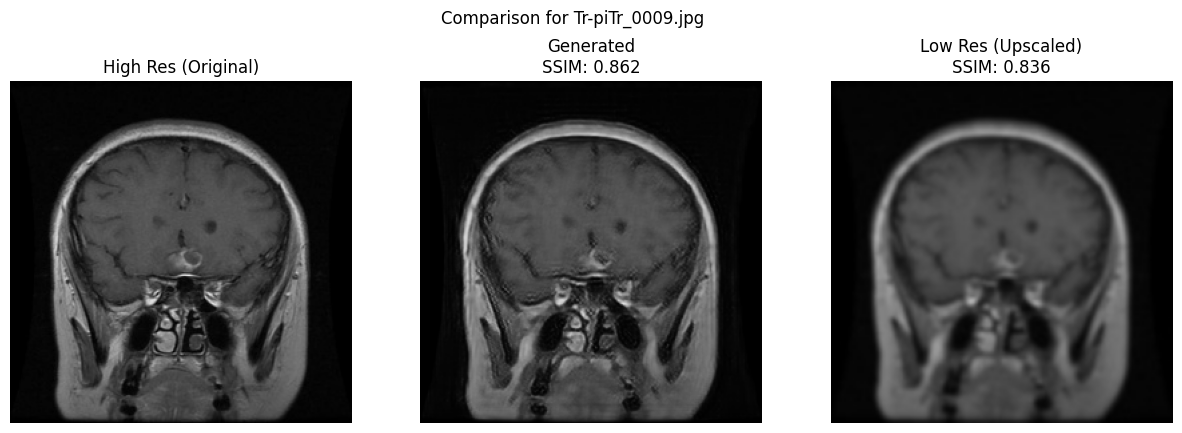


Final Results Table:
Filename                       SSIM (Generated)     SSIM (LR Upscaled)  
----------------------------------------------------------------------
Tr-piTr_0000.jpg               0.877                0.829               
Tr-piTr_0001.jpg               0.841                0.784               
Tr-piTr_0002.jpg               0.832                0.777               
Tr-piTr_0003.jpg               0.803                0.736               
Tr-piTr_0004.jpg               0.814                0.752               
Tr-piTr_0005.jpg               0.842                0.789               
Tr-piTr_0006.jpg               0.841                0.791               
Tr-piTr_0007.jpg               0.833                0.783               
Tr-piTr_0008.jpg               0.837                0.780               
Tr-piTr_0009.jpg               0.862                0.836               

Average SSIM (Generated): 0.838
Average SSIM (LR Upscaled): 0.786


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return ssim(img1_gray, img2_gray, data_range=img2_gray.max() - img2_gray.min())

def load_images(folder, count):
    files = sorted(os.listdir(folder))[:count]
    images = []
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        images.append((img, f))
    return images

# Paths
lr_folder = './Data/LR'   # Low resolution images
hr_folder = './Data/HR'   # High resolution images (original)
model_path = './final_model/final_generator.h5'

n_samples = 10

# Load model
generator = load_model(model_path)
print("Model loaded!")

# Load images
lr_images = load_images(lr_folder, n_samples)
hr_images = load_images(hr_folder, n_samples)

results = []

for i in range(n_samples):
    lr_bgr, filename = lr_images[i]
    hr_bgr, _ = hr_images[i]

    # Resize HR to (256,256) for consistent comparison/display
    hr_resized = cv2.resize(hr_bgr, (256, 256))
    
    # Prepare LR image for model input: assuming model input size is (128,128)
    input_img = cv2.resize(lr_bgr, (128, 128))
    input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_norm = input_img_gray / 255.0
    input_img_norm = np.expand_dims(input_img_norm, axis=-1)  # (128,128,1)
    input_img_norm = np.expand_dims(input_img_norm, axis=0)   # (1,128,128,1)

    # Predict generated HR image
    generated_img = generator.predict(input_img_norm)[0]      # (128,128,1)
    generated_img = np.squeeze(generated_img)
    generated_img = np.clip(generated_img * 255.0, 0, 255).astype(np.uint8)

    # Resize generated image to (256,256) for comparison
    generated_resized = cv2.resize(generated_img, (256, 256))
    generated_bgr = cv2.merge([generated_resized]*3)

    # Upscale LR to (256,256) for baseline SSIM comparison
    lr_upscaled = cv2.resize(lr_bgr, (256, 256))

    # Calculate SSIM
    ssim_gen = calculate_ssim(hr_resized, generated_bgr)
    ssim_lr = calculate_ssim(hr_resized, lr_upscaled)

    results.append({
        'filename': filename,
        'SSIM_Generated': ssim_gen,
        'SSIM_LR': ssim_lr
    })

    # Show images side by side: HR original, Generated, LR upscaled
    hr_rgb = cv2.cvtColor(hr_resized, cv2.COLOR_BGR2RGB)
    gen_rgb = cv2.cvtColor(generated_bgr, cv2.COLOR_BGR2RGB)
    lr_rgb = cv2.cvtColor(lr_upscaled, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(hr_rgb)
    axs[0].set_title('High Res (Original)')
    axs[1].imshow(gen_rgb)
    axs[1].set_title(f'Generated\nSSIM: {ssim_gen:.3f}')
    axs[2].imshow(lr_rgb)
    axs[2].set_title(f'Low Res (Upscaled)\nSSIM: {ssim_lr:.3f}')
    for ax in axs:
        ax.axis('off')
    plt.suptitle(f'Comparison for {filename}')
    plt.show()

# Print results table
print("\nFinal Results Table:")
print(f"{'Filename':<30} {'SSIM (Generated)':<20} {'SSIM (LR Upscaled)':<20}")
print("-" * 70)
for res in results:
    print(f"{res['filename']:<30} {res['SSIM_Generated']:<20.3f} {res['SSIM_LR']:<20.3f}")

avg_ssim_gen = np.mean([r['SSIM_Generated'] for r in results])
avg_ssim_lr = np.mean([r['SSIM_LR'] for r in results])

print(f"\nAverage SSIM (Generated): {avg_ssim_gen:.3f}")
print(f"Average SSIM (LR Upscaled): {avg_ssim_lr:.3f}")


# Method 2 Peak signal to noise ratio 

## General class

In [13]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_psnr(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return psnr(img1_gray, img2_gray, data_range=255)

def load_images(folder, count):
    files = sorted(os.listdir(folder))[:count]
    images = []
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        images.append((img, f))
    return images

# Paths
lr_folder = './Data/LR'   # Low resolution images
hr_folder = './Data/HR'   # High resolution images (original)
model_path = './final_model/final_generator.h5'

n_samples = 10

# Load model
generator = load_model(model_path)
print("Model loaded!")

# Load images
lr_images = load_images(lr_folder, n_samples)
hr_images = load_images(hr_folder, n_samples)

results = []

for i in range(n_samples):
    lr_bgr, filename = lr_images[i]
    hr_bgr, _ = hr_images[i]

    hr_resized = cv2.resize(hr_bgr, (256, 256))

    # Prepare LR input
    input_img = cv2.resize(lr_bgr, (128, 128))
    input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_norm = input_img_gray / 255.0
    input_img_norm = np.expand_dims(input_img_norm, axis=-1)
    input_img_norm = np.expand_dims(input_img_norm, axis=0)

    # Generate image
    generated_img = generator.predict(input_img_norm)[0]
    generated_img = np.squeeze(generated_img)
    generated_img = np.clip(generated_img * 255.0, 0, 255).astype(np.uint8)

    generated_resized = cv2.resize(generated_img, (256, 256))
    generated_bgr = cv2.merge([generated_resized]*3)

    lr_upscaled = cv2.resize(lr_bgr, (256, 256))

    # Calculate PSNR
    psnr_gen = calculate_psnr(hr_resized, generated_bgr)
    psnr_lr = calculate_psnr(hr_resized, lr_upscaled)

    results.append({
        'filename': filename,
        'PSNR_Generated': psnr_gen,
        'PSNR_LR': psnr_lr
    })

# Print results table
print("\nFinal Results Table:")
print(f"{'Filename':<30} {'PSNR (Generated)':<20} {'PSNR (LR Upscaled)':<20}")
print("-" * 70)
for res in results:
    print(f"{res['filename']:<30} {res['PSNR_Generated']:<20.2f} {res['PSNR_LR']:<20.2f}")

avg_psnr_gen = np.mean([r['PSNR_Generated'] for r in results])
avg_psnr_lr = np.mean([r['PSNR_LR'] for r in results])

print(f"\nAverage PSNR (Generated): {avg_psnr_gen:.2f}")
print(f"Average PSNR (LR Upscaled): {avg_psnr_lr:.2f}")


Model loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

Final Results Table:
Filename                       PSNR (Generated)     PSNR (LR Upscaled)  
----------------------------------------------------------------------
Tr-piTr_0000.jpg               28.80                25.69               
Tr-piTr_0001.jpg               29.95                26.66               
Tr-piTr_0002.jpg               28.84                26.23               
Tr-piTr_0003.jpg               29.10                27.07               
Tr-piTr_0004.jpg               29.31                27.05               
Tr-piTr_0005.jpg               28.76                26.58        

## positive class


## Positive class

In [14]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_psnr(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return psnr(img1_gray, img2_gray, data_range=255)

def load_images(folder, count):
    files = sorted(os.listdir(folder))[:count]
    images = []
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        images.append((img, f))
    return images

# Paths
lr_folder = './noised-mri-positive/'   # Low resolution images
hr_folder = './mri-positive'   # High resolution images (original)
model_path = './final_model/final_generator.h5'

n_samples = 10

# Load model
generator = load_model(model_path)
print("Model loaded!")

# Load images
lr_images = load_images(lr_folder, n_samples)
hr_images = load_images(hr_folder, n_samples)

results = []

for i in range(n_samples):
    lr_bgr, filename = lr_images[i]
    hr_bgr, _ = hr_images[i]

    hr_resized = cv2.resize(hr_bgr, (256, 256))

    # Prepare LR input
    input_img = cv2.resize(lr_bgr, (128, 128))
    input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_norm = input_img_gray / 255.0
    input_img_norm = np.expand_dims(input_img_norm, axis=-1)
    input_img_norm = np.expand_dims(input_img_norm, axis=0)

    # Generate image
    generated_img = generator.predict(input_img_norm)[0]
    generated_img = np.squeeze(generated_img)
    generated_img = np.clip(generated_img * 255.0, 0, 255).astype(np.uint8)

    generated_resized = cv2.resize(generated_img, (256, 256))
    generated_bgr = cv2.merge([generated_resized]*3)

    lr_upscaled = cv2.resize(lr_bgr, (256, 256))

    # Calculate PSNR
    psnr_gen = calculate_psnr(hr_resized, generated_bgr)
    psnr_lr = calculate_psnr(hr_resized, lr_upscaled)

    results.append({
        'filename': filename,
        'PSNR_Generated': psnr_gen,
        'PSNR_LR': psnr_lr
    })

# Print results table
print("\nFinal Results Table:")
print(f"{'Filename':<30} {'PSNR (Generated)':<20} {'PSNR (LR Upscaled)':<20}")
print("-" * 70)
for res in results:
    print(f"{res['filename']:<30} {res['PSNR_Generated']:<20.2f} {res['PSNR_LR']:<20.2f}")

avg_psnr_gen = np.mean([r['PSNR_Generated'] for r in results])
avg_psnr_lr = np.mean([r['PSNR_LR'] for r in results])

print(f"\nAverage PSNR (Generated): {avg_psnr_gen:.2f}")
print(f"Average PSNR (LR Upscaled): {avg_psnr_lr:.2f}")


Model loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step

Final Results Table:
Filename                       PSNR (Generated)     PSNR (LR Upscaled)  
----------------------------------------------------------------------
image(1).jpg                   29.60                27.28               
image(10).jpg                  29.05                26.97               
image(100).jpg                 28.31                27.67               
image(102).jpg                 28.98                27.37               
image(106).jpg                 28.27                25.97               
image(107).jpg                 25.86                24.36        

# Mean square error

## general class

In [26]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from skimage.metrics import mean_squared_error as mse

def calculate_mse(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return mse(img1_gray, img2_gray)

def load_images(folder, count):
    files = sorted(os.listdir(folder))[:count]
    images = []
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        images.append((img, f))
    return images

# Paths
lr_folder = './Data/LR'
hr_folder = './Data/HR'
model_path = './final_model/final_generator.h5'


n_samples = 10

# Load model
generator = load_model(model_path)
print("Model loaded!")

# Load images
lr_images = load_images(lr_folder, n_samples)
hr_images = load_images(hr_folder, n_samples)

results = []

for i in range(n_samples):
    lr_bgr, filename = lr_images[i]
    hr_bgr, _ = hr_images[i]

    hr_resized = cv2.resize(hr_bgr, (256, 256))
    input_img = cv2.resize(lr_bgr, (128, 128))
    input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_norm = input_img_gray / 255.0
    input_img_norm = np.expand_dims(input_img_norm, axis=-1)
    input_img_norm = np.expand_dims(input_img_norm, axis=0)

    generated_img = generator.predict(input_img_norm)[0]
    generated_img = np.squeeze(generated_img)
    generated_img = np.clip(generated_img * 255.0, 0, 255).astype(np.uint8)

    generated_resized = cv2.resize(generated_img, (256, 256))
    generated_bgr = cv2.merge([generated_resized] * 3)

    lr_upscaled = cv2.resize(lr_bgr, (256, 256))

    # Calculate MSE
    mse_gen = calculate_mse(hr_resized, generated_bgr)
    mse_lr = calculate_mse(hr_resized, lr_upscaled)

    results.append({
        'filename': filename,
        'MSE_Generated': mse_gen,
        'MSE_LR': mse_lr
    })

# Print results table
print("\nFinal Results Table:")
print(f"{'Filename':<30} {'MSE (Generated)':<20} {'MSE (LR Upscaled)':<20}")
print("-" * 70)
for res in results:
    print(f"{res['filename']:<30} {res['MSE_Generated']:<20.3f} {res['MSE_LR']:<20.3f}")

avg_mse_gen = np.mean([r['MSE_Generated'] for r in results])
avg_mse_lr = np.mean([r['MSE_LR'] for r in results])

print(f"\nAverage MSE (Generated): {avg_mse_gen:.3f}")
print(f"Average MSE (LR Upscaled): {avg_mse_lr:.3f}")


Model loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Final Results Table:
Filename                       MSE (Generated)      MSE (LR Upscaled)   
----------------------------------------------------------------------
Tr-piTr_0000.jpg               85.729               175.267             
Tr-piTr_0001.jpg               65.727               140.292             
Tr-piTr_0002.jpg               84.891               154.966             
Tr-piTr_0003.jpg               79.929               127.614             
Tr-piTr_0004.jpg               76.163               128.221             
Tr-piTr_0005.jpg               86.435               142.891      

## Positive class

In [16]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from skimage.metrics import mean_squared_error as mse

def calculate_mse(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return mse(img1_gray, img2_gray)

def load_images(folder, count):
    files = sorted(os.listdir(folder))[:count]
    images = []
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        images.append((img, f))
    return images

# Paths
lr_folder = './noised-mri-positive/'   # Low resolution images
hr_folder = './mri-positive'   # High resolution images (original)
model_path = './final_model/final_generator.h5'
n_samples = 10

# Load model
generator = load_model(model_path)
print("Model loaded!")

# Load images
lr_images = load_images(lr_folder, n_samples)
hr_images = load_images(hr_folder, n_samples)

results = []

for i in range(n_samples):
    lr_bgr, filename = lr_images[i]
    hr_bgr, _ = hr_images[i]

    hr_resized = cv2.resize(hr_bgr, (256, 256))
    input_img = cv2.resize(lr_bgr, (128, 128))
    input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_norm = input_img_gray / 255.0
    input_img_norm = np.expand_dims(input_img_norm, axis=-1)
    input_img_norm = np.expand_dims(input_img_norm, axis=0)

    generated_img = generator.predict(input_img_norm)[0]
    generated_img = np.squeeze(generated_img)
    generated_img = np.clip(generated_img * 255.0, 0, 255).astype(np.uint8)

    generated_resized = cv2.resize(generated_img, (256, 256))
    generated_bgr = cv2.merge([generated_resized] * 3)

    lr_upscaled = cv2.resize(lr_bgr, (256, 256))

    # Calculate MSE
    mse_gen = calculate_mse(hr_resized, generated_bgr)
    mse_lr = calculate_mse(hr_resized, lr_upscaled)

    results.append({
        'filename': filename,
        'MSE_Generated': mse_gen,
        'MSE_LR': mse_lr
    })

# Print results table
print("\nFinal Results Table:")
print(f"{'Filename':<30} {'MSE (Generated)':<20} {'MSE (LR Upscaled)':<20}")
print("-" * 70)
for res in results:
    print(f"{res['filename']:<30} {res['MSE_Generated']:<20.3f} {res['MSE_LR']:<20.3f}")

avg_mse_gen = np.mean([r['MSE_Generated'] for r in results])
avg_mse_lr = np.mean([r['MSE_LR'] for r in results])

print(f"\nAverage MSE (Generated): {avg_mse_gen:.3f}")
print(f"Average MSE (LR Upscaled): {avg_mse_lr:.3f}")


Model loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Final Results Table:
Filename                       MSE (Generated)      MSE (LR Upscaled)   
----------------------------------------------------------------------
image(1).jpg                   71.373               121.587             
image(10).jpg                  80.945               130.604             
image(100).jpg                 96.010               111.145             
image(102).jpg                 82.266               119.205             
image(106).jpg                 96.824               164.474             
image(107).jpg                 168.850              238.522      